<a href="https://colab.research.google.com/github/aaq2000/PythonAI/blob/main/Aakif_Qidwai_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab #2**

**First and Last Name: Aakif Qidwai**

**Student ID: 500916258**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression


df = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')

**EDA #1: Code below implements how much of each class 0 and 1 is present**

There are 302 zeroes and 160 ones. Approximately 65% of the dataset are zeroes and 35% is ones.



In [ ]:
df["chd"].value_counts()

0    302
1    160
Name: chd, dtype: int64

**EDA #2: Code below shows how many missing values there are in the dataset**

In [ ]:
df.isnull().sum()


row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

**EDA #3: Code below shows how many categorical values there are in the features**

As shown by the results, 'famhistory' is the categorical value because its results are not numerical.

In [ ]:
df.dtypes


row.names      int64
sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

**EDA #4: Code below shows which features have maximum correlation**

As the results show, adiposity and obesity have the maximum correlation

In [ ]:
cor = df.corr()
cor

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
row.names,1.000000,0.171583,-0.044813,-0.064014,0.033851,-0.147769,-0.026758,0.088825,-0.014064,-0.063808
sbp,0.171583,1.000000,0.212247,0.158296,0.356500,-0.057454,0.238067,0.140096,0.388771,0.192354
tobacco,-0.044813,0.212247,1.000000,0.158905,0.286640,-0.014608,0.124529,0.200813,0.450330,0.299718
ldl,-0.064014,0.158296,0.158905,1.000000,0.440432,0.044048,0.330506,-0.033403,0.311799,0.263053
adiposity,0.033851,0.356500,0.286640,0.440432,1.000000,-0.043144,0.716556,0.100330,0.625954,0.254121
typea,-0.147769,-0.057454,-0.014608,0.044048,-0.043144,1.000000,0.074006,0.039498,-0.102606,0.103156
obesity,-0.026758,0.238067,0.124529,0.330506,0.716556,0.074006,1.000000,0.051620,0.291777,0.100095
alcohol,0.088825,0.140096,0.200813,-0.033403,0.100330,0.039498,0.051620,1.000000,0.101125,0.062531
age,-0.014064,0.388771,0.450330,0.311799,0.625954,-0.102606,0.291777,0.101125,1.000000,0.372973
chd,-0.063808,0.192354,0.299718,0.263053,0.254121,0.103156,0.100095,0.062531,0.372973,1.000000


**One Hot-Encoding implemented with the code below:**

In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['famhist'])
print(one_hot_encoded_data)

     row.names  sbp  tobacco    ldl  adiposity  typea  obesity  alcohol  age  \
0            1  160    12.00   5.73      23.11     49    25.30    97.20   52   
1            2  144     0.01   4.41      28.61     55    28.87     2.06   63   
2            3  118     0.08   3.48      32.28     52    29.14     3.81   46   
3            4  170     7.50   6.41      38.03     51    31.99    24.26   58   
4            5  134    13.60   3.50      27.78     60    25.99    57.34   49   
..         ...  ...      ...    ...        ...    ...      ...      ...  ...   
457        459  214     0.40   5.98      31.72     64    28.45     0.00   58   
458        460  182     4.20   4.41      32.10     52    28.61    18.72   52   
459        461  108     3.00   1.59      15.23     40    20.09    26.64   55   
460        462  118     5.40  11.61      30.79     64    27.35    23.97   40   
461        463  132     0.00   4.82      33.41     62    14.70     0.00   46   

     chd  famhist_Absent  famhist_Prese

**Code below implements Standardization of Data**

In [ ]:
sbp = one_hot_encoded_data['sbp']
tobacco = one_hot_encoded_data['tobacco']
ldl = one_hot_encoded_data['ldl']
adiposity = one_hot_encoded_data['adiposity']
famhistA = one_hot_encoded_data['famhist_Absent']
famhistP = one_hot_encoded_data['famhist_Present']
typea = one_hot_encoded_data['typea']
obesity = one_hot_encoded_data['obesity']
alcohol = one_hot_encoded_data['alcohol']
age = one_hot_encoded_data['age']

chd = one_hot_encoded_data['chd']
y = chd

sbp_standardized = preprocessing.scale(sbp)
tobacco_standardized = preprocessing.scale(tobacco)
ldl_standardized = preprocessing.scale(ldl)
adiposity_standardized = preprocessing.scale(adiposity)
typea_standardized = preprocessing.scale(typea)
obesity_standardized = preprocessing.scale(obesity)
alcohol_standardized = preprocessing.scale(alcohol)
age_standardized = preprocessing.scale(age)
standardized_data = np.array([sbp_standardized, tobacco_standardized, ldl_standardized, adiposity_standardized, typea_standardized, obesity_standardized, alcohol_standardized, age_standardized, famhistA])




**Code below defines the sigmoid function**

In [ ]:
def sigmoid(w, x, b):
  z = b + np.matmul(w, x)
  return (1/(1 + np.exp(-z)))

**Code below defines the cost function**

In [ ]:
def cost_func(y, yhat):
  return -np.sum(np.dot(y.T,np.log(1-yhat)+np.dot((1-y).T,np.log(1-yhat))))/( len(y))

**Code below implements the Batch gradient descent iteration**

In [ ]:
def update(b, w, y, yhat, x, a):
    db = np.sum(yhat - y)/len(y)
    b = b - a*db
    dw = np.dot((yhat - y),x.T)/len(y)
    w = w - a*dw
    return b,w

def GradientDescentCost(iterations, x, y, a):
  b = 1
  w = np.random.rand(1, 9)
  costA = []
  for i in range(iterations):
    yhat = sigmoid(w, x, b)
    yhat = np.reshape(yhat, len(y))
    y=np.reshape(y, len(y))
    cost = cost_func(y,yhat)
    b_old = b
    w_old = w
    b,w = update(b_old, w_old, y, yhat, x, a)
    costA.append(cost)
  return costA, b, w

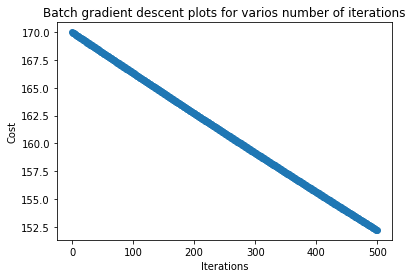

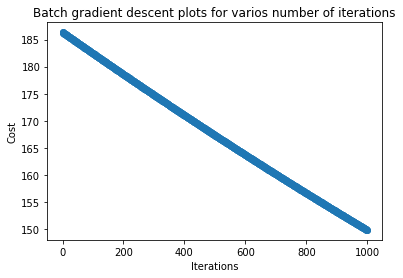

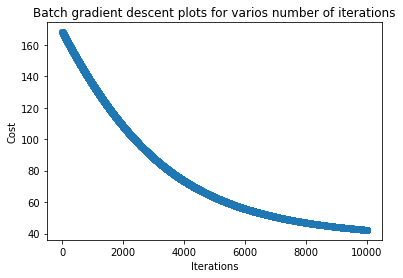

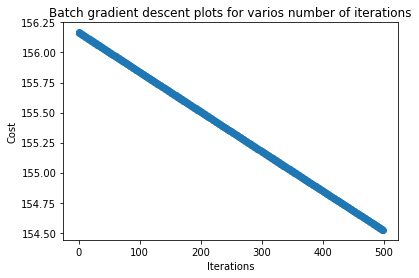

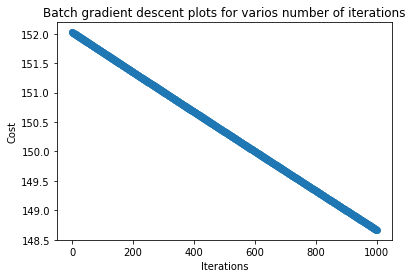

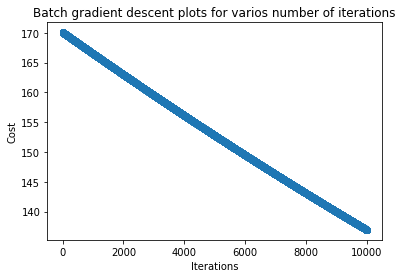

<Figure size 432x288 with 0 Axes>

In [ ]:
alpha = [0.001, 0.0001]
iterations = [500, 1000, 10000]
beta = 0
theta = []

for i in range(len(alpha)):
  for j in range(len(iterations)):
    costFunction, beta, theta = GradientDescentCost(iterations[j], standardized_data, y, alpha[i])
    plt.scatter(range(iterations[j]), costFunction)
    plt.title("Batch gradient descent plots for varios number of iterations")
    plt.ylabel('Cost')
    plt.xlabel('Iterations')
    plt.figure()

**Based on what you see in the learning curve, what value for epoch does seem reasonable to stop training for each learning rates (cost will not decrease significantly anymore)?**

When alpha = 0.001,the graphs for 500 and 1000 iterations have linear graphs and so more iterations are needed for each. At around 10000 iterations is when you can see changes happenning the cost starts decreasing. When alpha = 0.0001, even 10000 iterations isnt enough to see the cost start decreasing and so the graphs for all the iterations are linear.

**Code below implements the mini-batch gradient descent iteration**

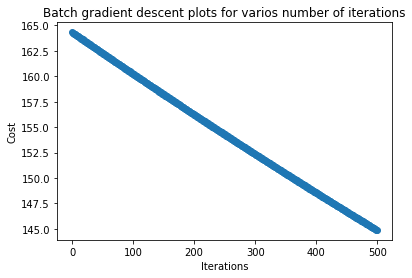

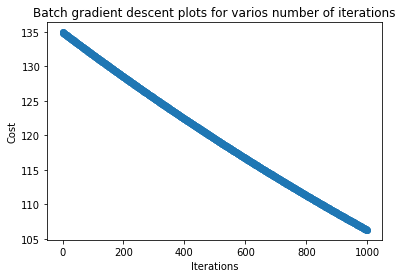

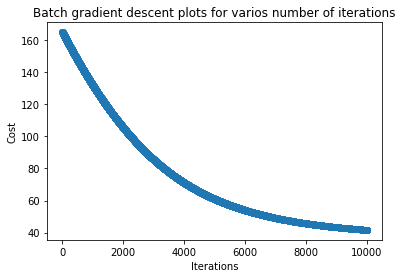

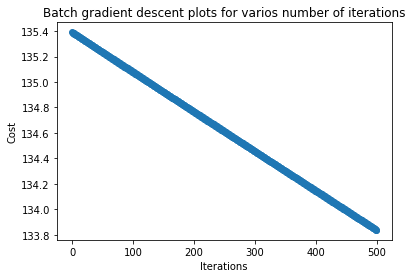

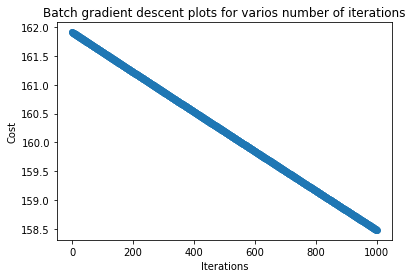

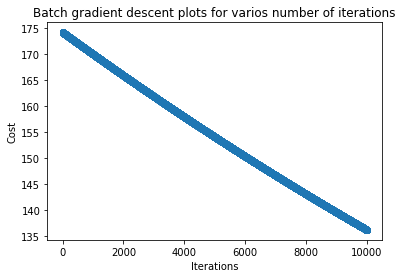

<Figure size 432x288 with 0 Axes>

In [ ]:
def minibatch_gradient_descent(X,y,theta,alpha=0.001,iterations=500,batch_size =50):
    w = np.random.rand(1, 9)
    m = len(y)
    cost_change = np.zeros(iterations)
    n_batches = int(m/batch_size)

    for t in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]

            X_i = np.c_[np.ones(len(X_i)),X_i]

            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*alpha*( X_i.T.dot((prediction - y_i)))
            cost += cost_func(theta,X_i,y_i)
        cost_change[t]  = cost

    return theta, cost_change

def gradientDescent(iterations, x, y, a, batch_size):
  b = 1
  w = np.random.rand(1, 9)
  costA = []
  for i in range(iterations):
    yhat = sigmoid(w, x, b)
    yhat = np.reshape(yhat, len(y))
    y=np.reshape(y, len(y))
    cost = cost_func(y,yhat)
    b_old = b
    w_old = w
    b,w = update(b_old, w_old, y, yhat, x, a)
    costA.append(cost)
  return costA, b, w

alpha = [0.001, 0.0001]
iterations = [500, 1000, 10000]
beta = 0
theta = []
batch_size = 50

for i in range(len(alpha)):
  for j in range(len(iterations)):
    costFunction, beta, theta = GradientDescentCost(iterations[j], standardized_data, y, alpha[i])
    plt.scatter(range(iterations[j]), costFunction)
    plt.title("Batch gradient descent plots for varios number of iterations")
    plt.ylabel('Cost')
    plt.xlabel('Iterations')
    plt.figure()



# New Section

# New Section

**Based on what you see in the learning curve, what value for epoch does seem reasonable to stop training for each learning rates (cost will not decrease significantly anymore)?**

Similarly to the batch gradient descent results, when alpha = 0.001,the graphs for 500 and 1000 iterations have linear graphs and so more iterations are needed for each. At around 10000 iterations is when you can see changes happenning the cost starts decreasing. When alpha = 0.0001, even 10000 iterations isnt enough to see the cost start decreasing and so the graphs for all the iterations are linear.

**Comparing results with implemented library for batch gradient descent**

In [ ]:
logisticR = LogisticRegression()
logisticModel = logisticR.fit(standardized_data.T, y)

costFunct, beta, theta = GradientDescentCost(iterations[2], standardized_data, y, alpha[0])
print("Modeled theta coefficient")
print(logisticModel.coef_)
print("Calculated theta coefficient")
print(theta)
print("Deviation")
print(abs(logisticModel.coef_ - theta))

Modeled theta coefficient
[[ 0.1323615   0.36035752  0.35578382  0.14228084  0.37924611 -0.25497865
   0.00443777  0.64895064 -0.88057572]]
Calculated theta coefficient
[[ 0.13202836  0.37441293  0.3859652  -0.11598691  0.27880179 -0.0147875
   0.16526482  0.57487101 -0.64614419]]
Deviation
[[0.00033313 0.01405541 0.03018137 0.25826775 0.10044432 0.24019115
  0.16082706 0.07407963 0.23443153]]


The deviation shows that the values are fairly close to each other and the deviation is fairly small. Some coefficients differ more than others, such as coefficient 8.

**Comparing results with implemented library for mini-batch gradient descent**

In [ ]:
logisticR = LogisticRegression()
logisticModel = logisticR.fit(standardized_data.T, y)

costFunct, beta, theta = gradientDescent(iterations[2], standardized_data, y, alpha[0],batch_size)
print("Modeled theta coefficient")
print(logisticModel.coef_)
print("Calculated theta coefficient")
print(theta)
print("Deviation")
print(abs(logisticModel.coef_ - theta))

Modeled theta coefficient
[[ 0.1323615   0.36035752  0.35578382  0.14228084  0.37924611 -0.25497865
   0.00443777  0.64895064 -0.88057572]]
Calculated theta coefficient
[[ 0.27283903  0.46127861  0.4831107  -0.12381971  0.3159189  -0.0410068
   0.07847026  0.43137762 -0.55329889]]
Deviation
[[0.14047753 0.10092109 0.12732688 0.26610055 0.06332721 0.21397185
  0.07403249 0.21757302 0.32727683]]


As seen by the deviation, the values are fairly close to each other and the deviation is fairly small. Some coefficients differ more than others.